# Knowledge Graph Generation

### 0. Setup

In [6]:
input_text = """
For the financial analyst, it is crucial to extract and analyze infor- mation from unstructured data sources like news articles, earnings reports, and other financial documents to have at least some chance to be on the better side of potential information asymmetry. These sources hold valuable insights that can impact investment decisions, market predictions, and overall sentiment. However, traditional data analysis methods struggle to effectively extract and utilize this information due to its unstructured nature. Large language models (LLMs) [ 1–4 ] have emerged as powerful tools for financial services and investment management. Their ability to process and understand vast amounts of textual data makes them invaluable for tasks such as sentiment analysis, market trend predictions, and automated report generation. Specifically, extracting information from annual reports and other financial documents can greatly en- hance the efficiency and accuracy of financial analysts [5 ]. A robust information extraction system can help analysts quickly gather relevant data, identify market trends, and make informed decisions, leading to better investment strategies and risk management [6]. Although LLMs have substantial potential in financial applica- tions, there are notable challenges in using pre-trained models to extract information from financial documents outside their training data while also reducing hallucination [ 7, 8 ]. Financial documents typically contain domain-specific language, multiple data formats, and unique contextual relationships that general purpose-trained LLMs do not handle well. In addition, extracting consistent and coherent information from multiple financial documents can be challenging due to variations in terminology, format, and context across different textual sources. The specialized terminology and complex data formats in financial documents make it difficult for models to extract meaningful insights, in turn, causing inaccurate predictions, overlooked insights, and unreliable analysis, which ultimately hinder the ability to make well-informed decisions. Current approaches to mitigate these issues include various Retrieval-Augmented Generation (RAG) techniques [9 ], which aim to improve the performance of LLMs by incorporating relevant retrieval techniques. VectorRAG (the traditional RAG techniques that are based on vector databases) focuses on improving Natural Language Processing (NLP) tasks by retrieving relevant textual information to support the generation tasks. VectorRAG excels in situations where context from related textual documents is crucial for generating meaningful and coherent responses [9 – 11]. RAG- based methods ensure the LLMs generate relevant and coherent responses that are aligned with the original input query. How- ever, for financial documents, these approaches have significant challenges as a standalone solution. For instance, traditional RAG systems often use paragraph-level chunking techniques, which assume the text in those documents are uniform in length. This approach neglects the hierarchical nature of financial statements and can result in the loss of critical contextual information for an accurate analysis[12 , 13 ]. Due to the complexities in analyzing fi- nancial documents, the quality of the LLM retrieved-context from a vast and heterogeneous corpus can be inconsistent, leading to inaccuracies and incomplete analyses. These challenges demon- strate the need for more sophisticated methods that can effectively integrate and process the detailed and domain-specific information found in financial documents, ensuring more reliable and accurate results for informed decision-making. Knowledge graphs (KGs) [ 14 ] may provide a different point of view to looking at the financial documents where the documents arXiv:2408.04948v1 [cs.CL] 9 Aug 2024 Sarmah et al. are viewed as a collection of triplets of entities and their relation- ships as depicted in the text of the documents. KGs have become a pivotal technology in data management and analysis, provid- ing a structured way to represent knowledge through entities and relationships and have been widely adopted in various domains, including search engines, recommendation systems, and biomedical research [ 15 –17 ]. The primary advantage of KGs lies in their ability to offer a structured representation, which facilitates efficient query- ing and reasoning. However, building and maintaining KGs and integrating data from different sources, such as documents, news articles, and other external sources, into a coherent knowledge graph poses significant challenges. The financial services industry has recognized the potential of KGs in enhancing data integration of heterogeneous data sources, risk management, and predictive analytics [18? –21 ]. Financial KGs integrate various financial data sources such as market data, fi- nancial reports, and news articles, creating a comprehensive view of financial entities and their relationships. This unified view im- proves the accuracy and comprehensiveness of financial analysis, facilitates risk management by identifying hidden relationships, and supports advanced predictive analytics for more accurate mar- ket predictions and investment decisions. However, handling large volumes of financial data and continuously updating the knowledge graph to reflect the dynamic nature of financial markets can be challenging and resource-intensive. GraphRAG (Graph-based Retrieval-Augmented Generation) [ 22 – 27 ] is a novel approach that leverages knowledge graphs (KGs) to enhance the performance of NLP tasks such as Q&A systems. By integrating KGs with RAG techniques, GraphRAG enables more accurate and context-aware generation of responses based on the structured information extracted from financial documents. But GraphRAG generally underperforms in abstractive Q&A tasks or when there is not explicit entity mentioned in the question. In the present work, we propose a combination of VectorRAG and GraphRAG, called HybridRAG, to retrieve the relevant information from external documents for a given query to the LLM that brings advantages of both the RAGs together to provide demonstrably more accurate answers to the queries.
"""


### 1. Open Information Extraction
Extract relational triplets (Subject, Relation, Object) from input text

In [7]:
from llm_agents import llm_agent as agent

open_information_extraction_sysprompt = """
Given a piece of text, extract relational triplets in the form of [Subject, Relation, Object] from it.
Relational triplets should have three items maximum. Only include the triplets in your response.
Here are some examples: Example 1: Text: The 17068.8 millimeter long ALCO RS-3 has a diesel-electric transmission. 
Example Output: ['ALCO RS-3', 'powerType', 'Diesel-electric transmission'], ['ALCO RS-3', 'length', '17068.8 (millimetres)']"
"""

relation_text = agent.run_agent(open_information_extraction_sysprompt, input_text)
relation_text


"['financial analyst', 'information', 'unstructured data sources'], ['financial analyst', 'insights', 'investment decisions'], ['financial analyst', 'market predictions', 'overall sentiment'], ['large language models (LLMs)', 'financial services', 'investment management'], ['financial documents', 'information extraction system', 'financial analysts'], ['LLMs', 'challenge', 'financial documents'], ['financial documents', 'domain-specific language', 'multiple data formats'], ['financial documents', 'contextual relationships', 'general purpose-trained LLMs'], ['financial documents', 'specialized terminology', 'complex data formats'], ['LLMs', 'extraction method', 'inaccuracies'], ['financial services', 'information extraction', 'financial documents'], ['financial documents', 'knowledge graphs (KGs)', 'data management and analysis'], ['financial documents', 'structured representation', 'entities and relationships'], ['financial documents', 'efficient querying', 'reasoning'], ['financial se

### 2. Schema Definition
Generate definitions for objects and relations given a text chunk and relational triplets

TODO: generate definitions for objects

In [19]:
schema_definition_sysprompt = """
Given a piece of text and a list of relational triplets extracted from it, write a definition for each relation present. 
Example 1: Text: The 17068.8 millimeter long ALCO RS-3 has a diesel-electric transmission. 
Triplets: [[’ALCO RS-3’, ’powerType’, ’Diesel-electric transmission’], 
[’ALCO RS-3’, ’length’, ’17068.8 (millimetres)’]] 
Definitions:
powerType: The subject entity uses the type of power or energy source specified by the object entity
length: The measurement or extent of something from end to end; the greater of two or the greatest of three dimensions of a body.
"""

schema_text = agent.run_agent(schema_definition_sysprompt, "Text: {}, Triplets: {}".format(input_text, relation_text))

### 3. Schema Canonicalization

In [20]:
# TODO

### 4. Graph Creation and Visualization

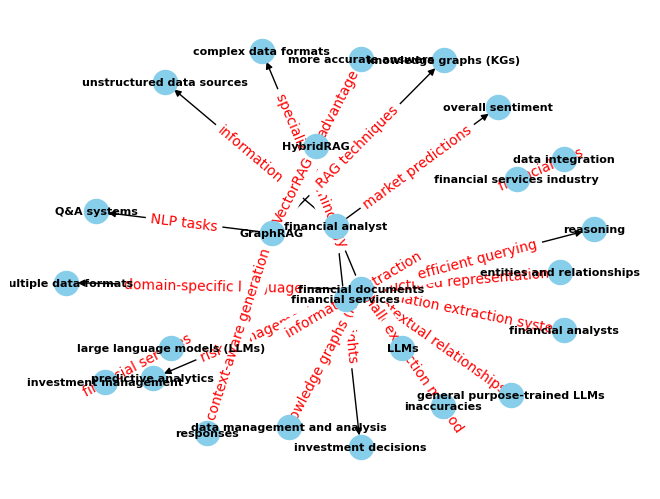

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

relation_tuples = []
for item in relation_text.split('], ['):
    item = item.strip('[]').replace("'", "").split(', ')
    relation_tuples.append((item[0], item[1], item[2]))

# Create a directed graph
graph = nx.DiGraph()

# Add edges to the graph
for subj, rel, obj in relation_tuples:
    graph.add_edge(subj, obj, relation=rel)

def visualize_graph(G):
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.show()

visualize_graph(graph)